In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('freeze.txt',skiprows=1)

Elapsed=np.array(data[:,1]/100000)
Temp=np.array(data[:,2])
Density=np.array(data[:,3])
Press=np.array(data[:,4])
Volume=np.array(data[:,5])
PotEng=np.array(data[:,6]*4.184/32768)
KinEng=np.array(data[:,7]*4.184/32768)
TotEng=np.array(data[:,8]*4.184/32768)
Enthalpy=np.array(data[:,9]*4.184/32768)

data = np.loadtxt('extended.txt',skiprows=1)

Elapsed2=np.array(data[:,1]/100000)
Temp2=np.array(data[:,2])
Density2=np.array(data[:,3])
Press2=np.array(data[:,4])
Volume2=np.array(data[:,5])
PotEng2=np.array(data[:,6]*4.184/32768)
KinEng2=np.array(data[:,7]*4.184/32768)
TotEng2=np.array(data[:,8]*4.184/32768)
Enthalpy2=np.array(data[:,9]*4.184/32768)

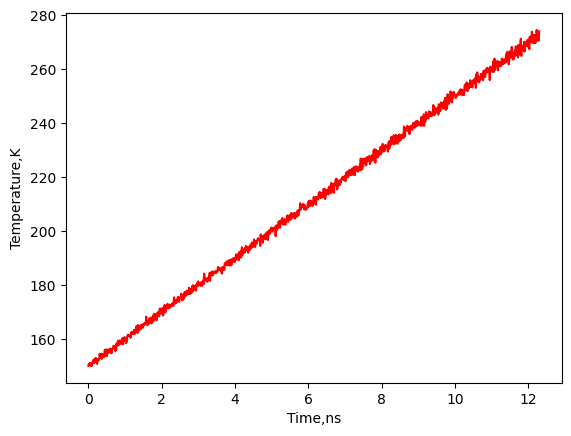

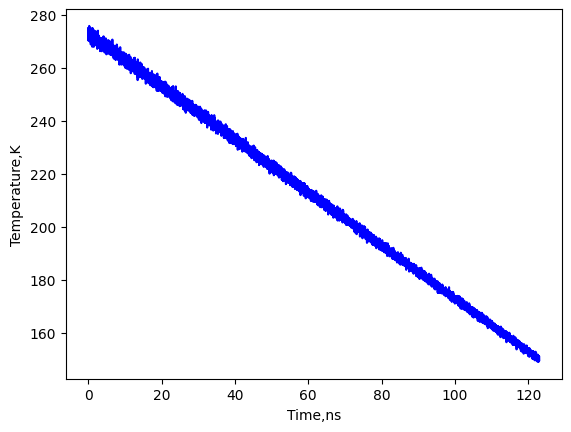

In [2]:
plt.plot(Elapsed,Temp,'r-')
plt.xlabel('Time,ns')
plt.ylabel('Temperature,K')
plt.show()
plt.plot(Elapsed2,Temp2,'b-')
plt.xlabel('Time,ns')
plt.ylabel('Temperature,K')
plt.show()

/tmp/ipykernel_157845/883036052.py:2: RankWarning: Polyfit may be poorly conditioned
  y=np.polyfit(Temp,Enthalpy,24)
/tmp/ipykernel_157845/883036052.py:33: RankWarning: Polyfit may be poorly conditioned
  z=np.polyfit(Temp2,Enthalpy2,118)


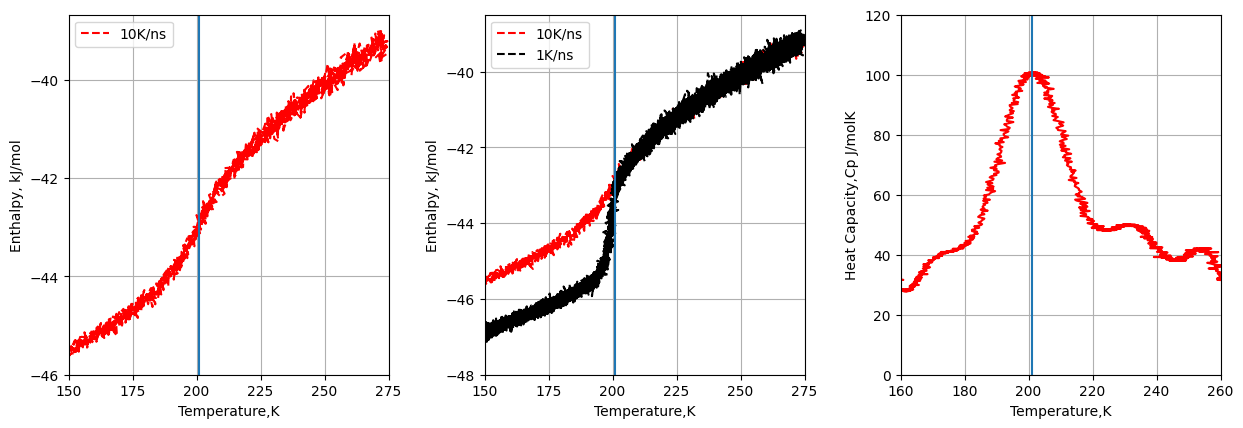

In [165]:
l=201
y=np.polyfit(Temp,Enthalpy,24)
f=np.poly1d(y)
T=np.linspace(Temp[0],Temp[-1],1231)
H=f(T)

dH=np.gradient(H,edge_order=2)
dT=np.gradient(T,edge_order=2)
dHdT=abs(dH/dT)
plt.subplot(1,3,1)
plt.plot(Temp,Enthalpy,'r--',label="10K/ns")
plt.legend(loc="upper left")
plt.grid()
plt.axvline(x=l)
plt.xlabel('Temperature,K')
plt.ylabel('Enthalpy, kJ/mol')
plt.xlim(150,273)
plt.xticks(np.arange(150,280,25))
plt.yticks(np.arange(-46,-38,2))

plt.subplot(1,3,3)
plt.plot(Temp,dHdT*1000,'r-')
plt.axvline(x=l)
plt.grid()
plt.xlabel('Temperature,K')
plt.ylabel('Heat Capacity,Cp J/molK')
plt.xticks(np.arange(160,265,20))
plt.xlim(160,260)
plt.ylim(0,120)


#Numerical differentiation of 1K/ns cooling if desired
z=np.polyfit(Temp2,Enthalpy2,118)
g=np.poly1d(z)
T2=np.linspace(Temp2[0],Temp2[-1],12301)
H2=g(T2)
dH2=np.gradient(H2,edge_order=2)
dT2=np.gradient(T2,edge_order=2)
dHdT2=abs(dH2/dT2)

plt.subplot(1,3,2)
plt.plot(Temp,Enthalpy,'r--',label="10K/ns")
plt.plot(Temp2,Enthalpy2,'k--',label="1K/ns")
plt.legend(loc="upper left")
plt.grid()
plt.axvline(x=l)
plt.xlabel('Temperature,K')
plt.ylabel('Enthalpy, kJ/mol')
plt.xlim(150,275)
plt.xticks(np.arange(150,280,25))
plt.yticks(np.arange(-48,-38,2))
plt.subplots_adjust(left=1,
                    bottom=0.5,
                    right=2.8,
                    top=1.25,
                    wspace=.3,
                    hspace=.3)
plt.show()

